# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

The things I will learn with today's lessons are:
1. Resample time series data to change periodicity
2. matplotlib styling: limits, labels, linestyles, markers, colors, chart resolution
3. Grids for seasonality in time series data, NaN values and counting
4. Locators to style time axis on a chart

# Import Statements

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

There's a lot of files, and the reading was already done for me, I just need to do the challenges

In [4]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li>
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [5]:
print(df_tesla.shape)
print(df_tesla.columns)
df_tesla.head()

(124, 3)
Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [6]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


We can use the describe method to give more insight on the dataframe

In [7]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [8]:
print(df_unemployment.shape)
print(df_unemployment.columns)
df_unemployment.head()

(181, 3)
Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [9]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [10]:
print(df_btc_search.shape)
print(df_btc_search.columns)
df_btc_search.head()

(73, 2)
Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [11]:
print(df_btc_price.shape)
print(df_btc_price.columns)
df_btc_price.head()

(2204, 3)
Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


Since we have two CSVs I had to do it twice, now for the largest search, I will need to use one only

In [12]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


Meaning for the values of Search:
100 is the peak popularity for the term for the region and time, 50 means half as popular, and 0 means not enough data available. So Google gives a scaled version and not the complete picture about search volume.

# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [13]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


I had almost forgotten about this, I should first check whether there's any at all

In [14]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [15]:
print(f'Number of missing values: {df_btc_price.isna().sum()}')
df_btc_price[df_btc_price.CLOSE.isna()]

Number of missing values: DATE      0
CLOSE     1
VOLUME    1
dtype: int64


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


The sum function works because True just means 1 and we can sum all the true values in the results of the isna() function to get the total number of missing values.

I had forgotten about the filter which could be used to get the row with the NaN value

**Challenge**: Remove any missing values that you found.

In [16]:
df_btc_price = df_btc_price.dropna()

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

I had already done this above, but since it's given as a challenge here, I should bring the code over maybe

In [17]:
print(type(df_tesla.MONTH[0]))
# Since string, convert to datetime
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)

<class 'str'>


In [18]:
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)

In [19]:
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [20]:
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

Our bitcoin price data is for daily, but search data is for monthly, we should resample daily data to monthly so that we can compare the search with price data.

I will follow the course instructions because the docs were enigmatic to say the least.

In [63]:
btc_price_monthly = df_btc_price.resample('MS', on='DATE').last()

None of these things were in the documentation for resample function. We apply the resample function on the entire dataframe but we specify which column to act on by using on='..', it must be a datetime-like object series.The first string is the resampled time string, we want to resample to monthly so we use 'MS' i.e. month start. The course had 'M' but it's going to be deprecated so using 'MS'.

I actually had it as 'MS' and the chart came off wrong, so had to adjust, it just felt more intuitive that we were taking the last day of the month when using last() as the operation on them.

After resampling, we must choose how to put the rest of the values in the row, here we chose the values at the end of the month. We could instead use mean() to get the average of the values over the month.

In [64]:
print(btc_price_monthly.shape)
btc_price_monthly.head()

(73, 2)


,CLOSE,VOLUME
DATE,,
2014-09-01,386.944000,34707300.0
2014-10-01,338.321014,12545400.0
2014-11-01,378.046997,9194440.0
2014-12-01,320.192993,13942900.0
2015-01-01,217.464005,23348200.0


We now have 73 rows, same as the search dataframe. This makes it easier for us to work with the two together.

# Data Visualisation

### Notebook Formatting & Style Helpers

In [46]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
year_fmt = mdates.DateFormatter('%Y')

We need these locators to know the specific point between the dates(years) which is not shown when using normal xticks.

I just did as per the course, this lets us add the month locators for the X-axis

In [41]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.

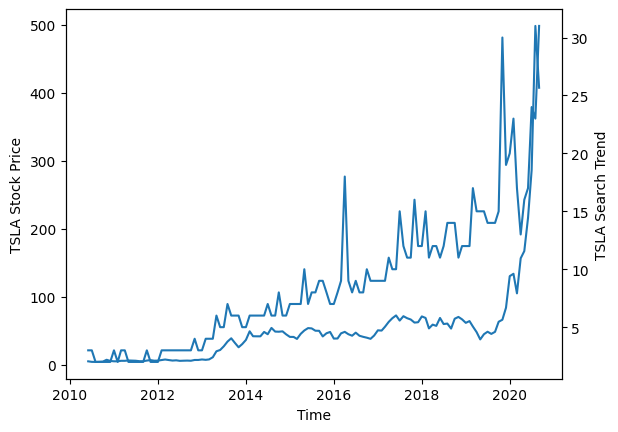

In [23]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel('Time')
ax1.set_ylabel('TSLA Stock Price')
ax2.set_ylabel('TSLA Search Trend')

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)

I had already put colors above but I didn't see the challenge below, so had to remove. Now I can put colors as per the challenge

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price.
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

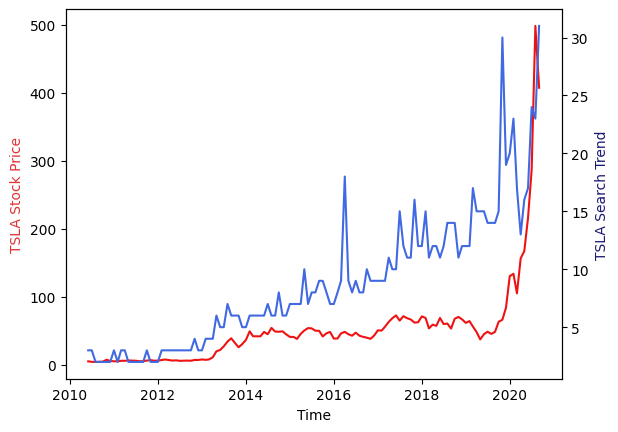

In [24]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel('Time')
ax1.set_ylabel('TSLA Stock Price', color='#e03232')
ax2.set_ylabel('TSLA Search Trend', color='midnightblue')

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#ef1212')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='royalblue')

I used different colors just for fun because I wanted to test more named colors and hex values

**Challenge**: Make the chart larger and easier to read.
1. Increase the figure size (e.g., to 14 by 8).
2. Increase the font sizes for the labels and the ticks on the x-axis to 14.
3. Rotate the text on the x-axis by 45 degrees.
4. Make the lines on the chart thicker.
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html).
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

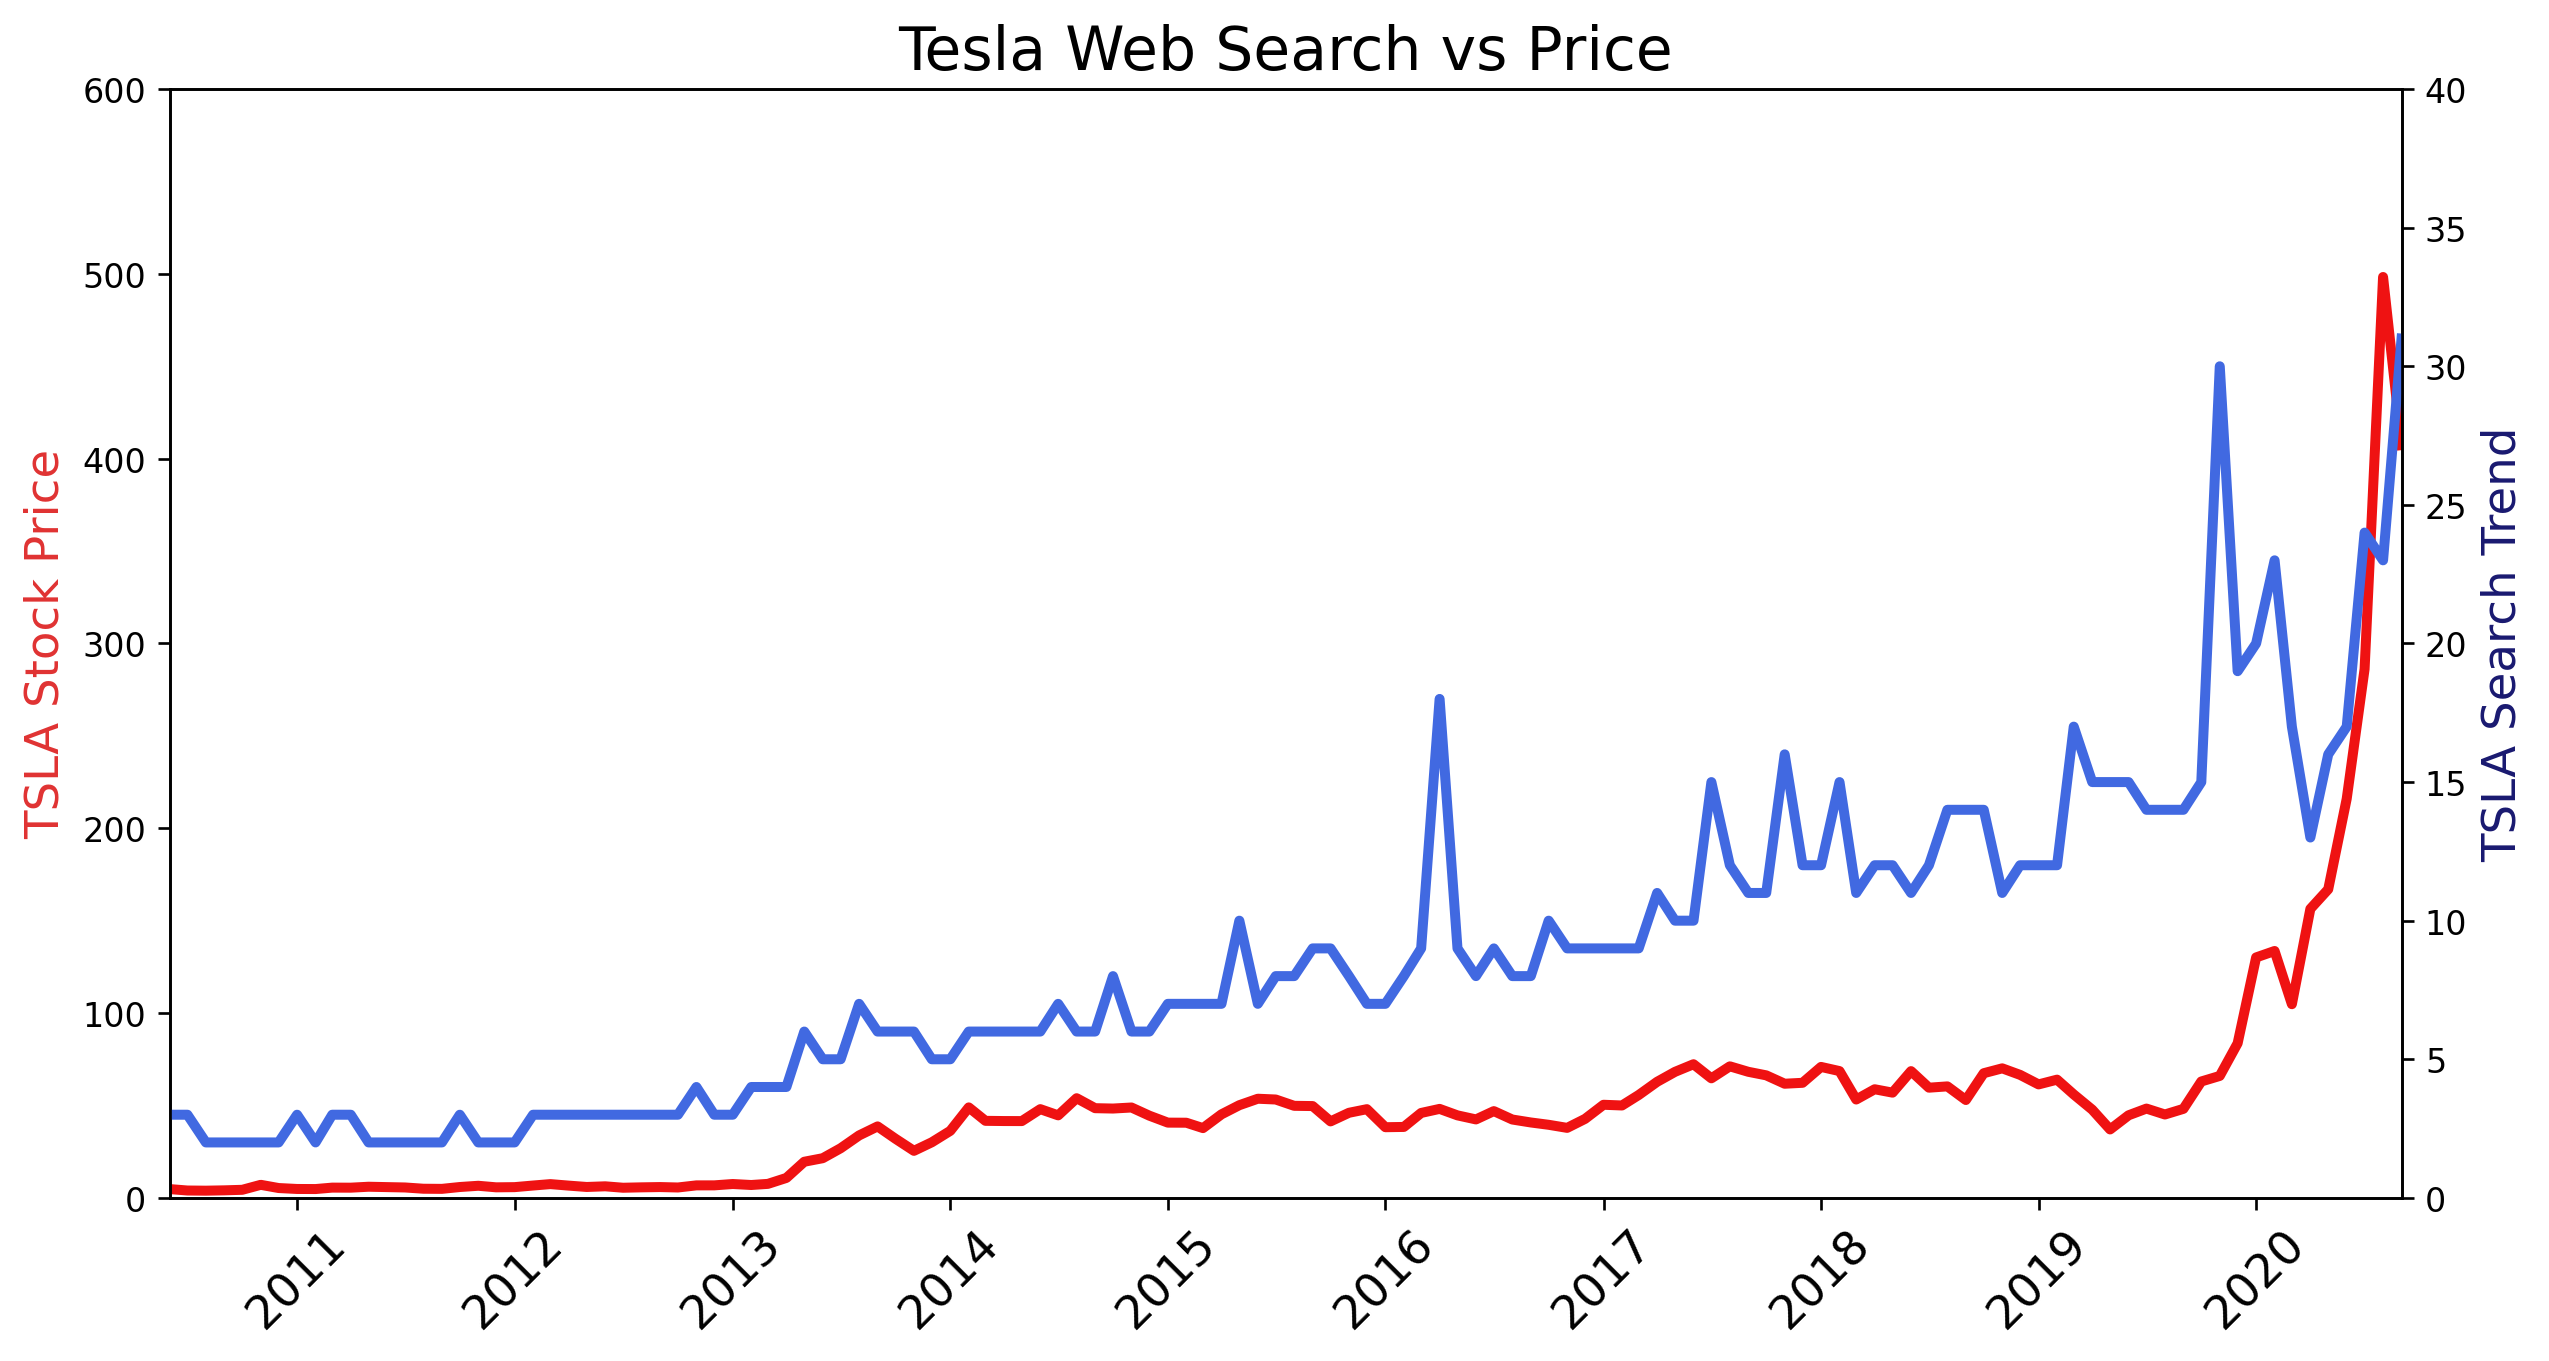

In [42]:
# I was confused because using plt.figure didn't change anything here
plt.figure(figsize=(12,6), dpi=240) # default is apparently 6.4x4.8 for figsize and 100 for dpi
plt.title('Tesla Web Search vs Price', fontsize=18) # Added fontsize as per course
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()]) # This one was straight from the solution, didn't know what else to do
ax1.set_ylim([0, 600]) # From the course soln: use limits like a list
ax2.set_ylim([0, 40])

ax1.set_ylabel('TSLA Stock Price', color='#e03232', fontsize=14)
ax2.set_ylabel('TSLA Search Trend', color='midnightblue', fontsize=14)

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#ef1212', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='royalblue', linewidth=3)

plt.show()

The plot was empty and the reason I found was declaring the axes before the actual plot figure, once I placed it below the plot figure description, it worked fine.

The course showed a warning message, but I didn't get any, but still I will include the fix for the thing on the codespace above. Perhaps pandas has already incorporated the fix into its library in latest versions.

How to add tick formatting for dates on the x-axis.

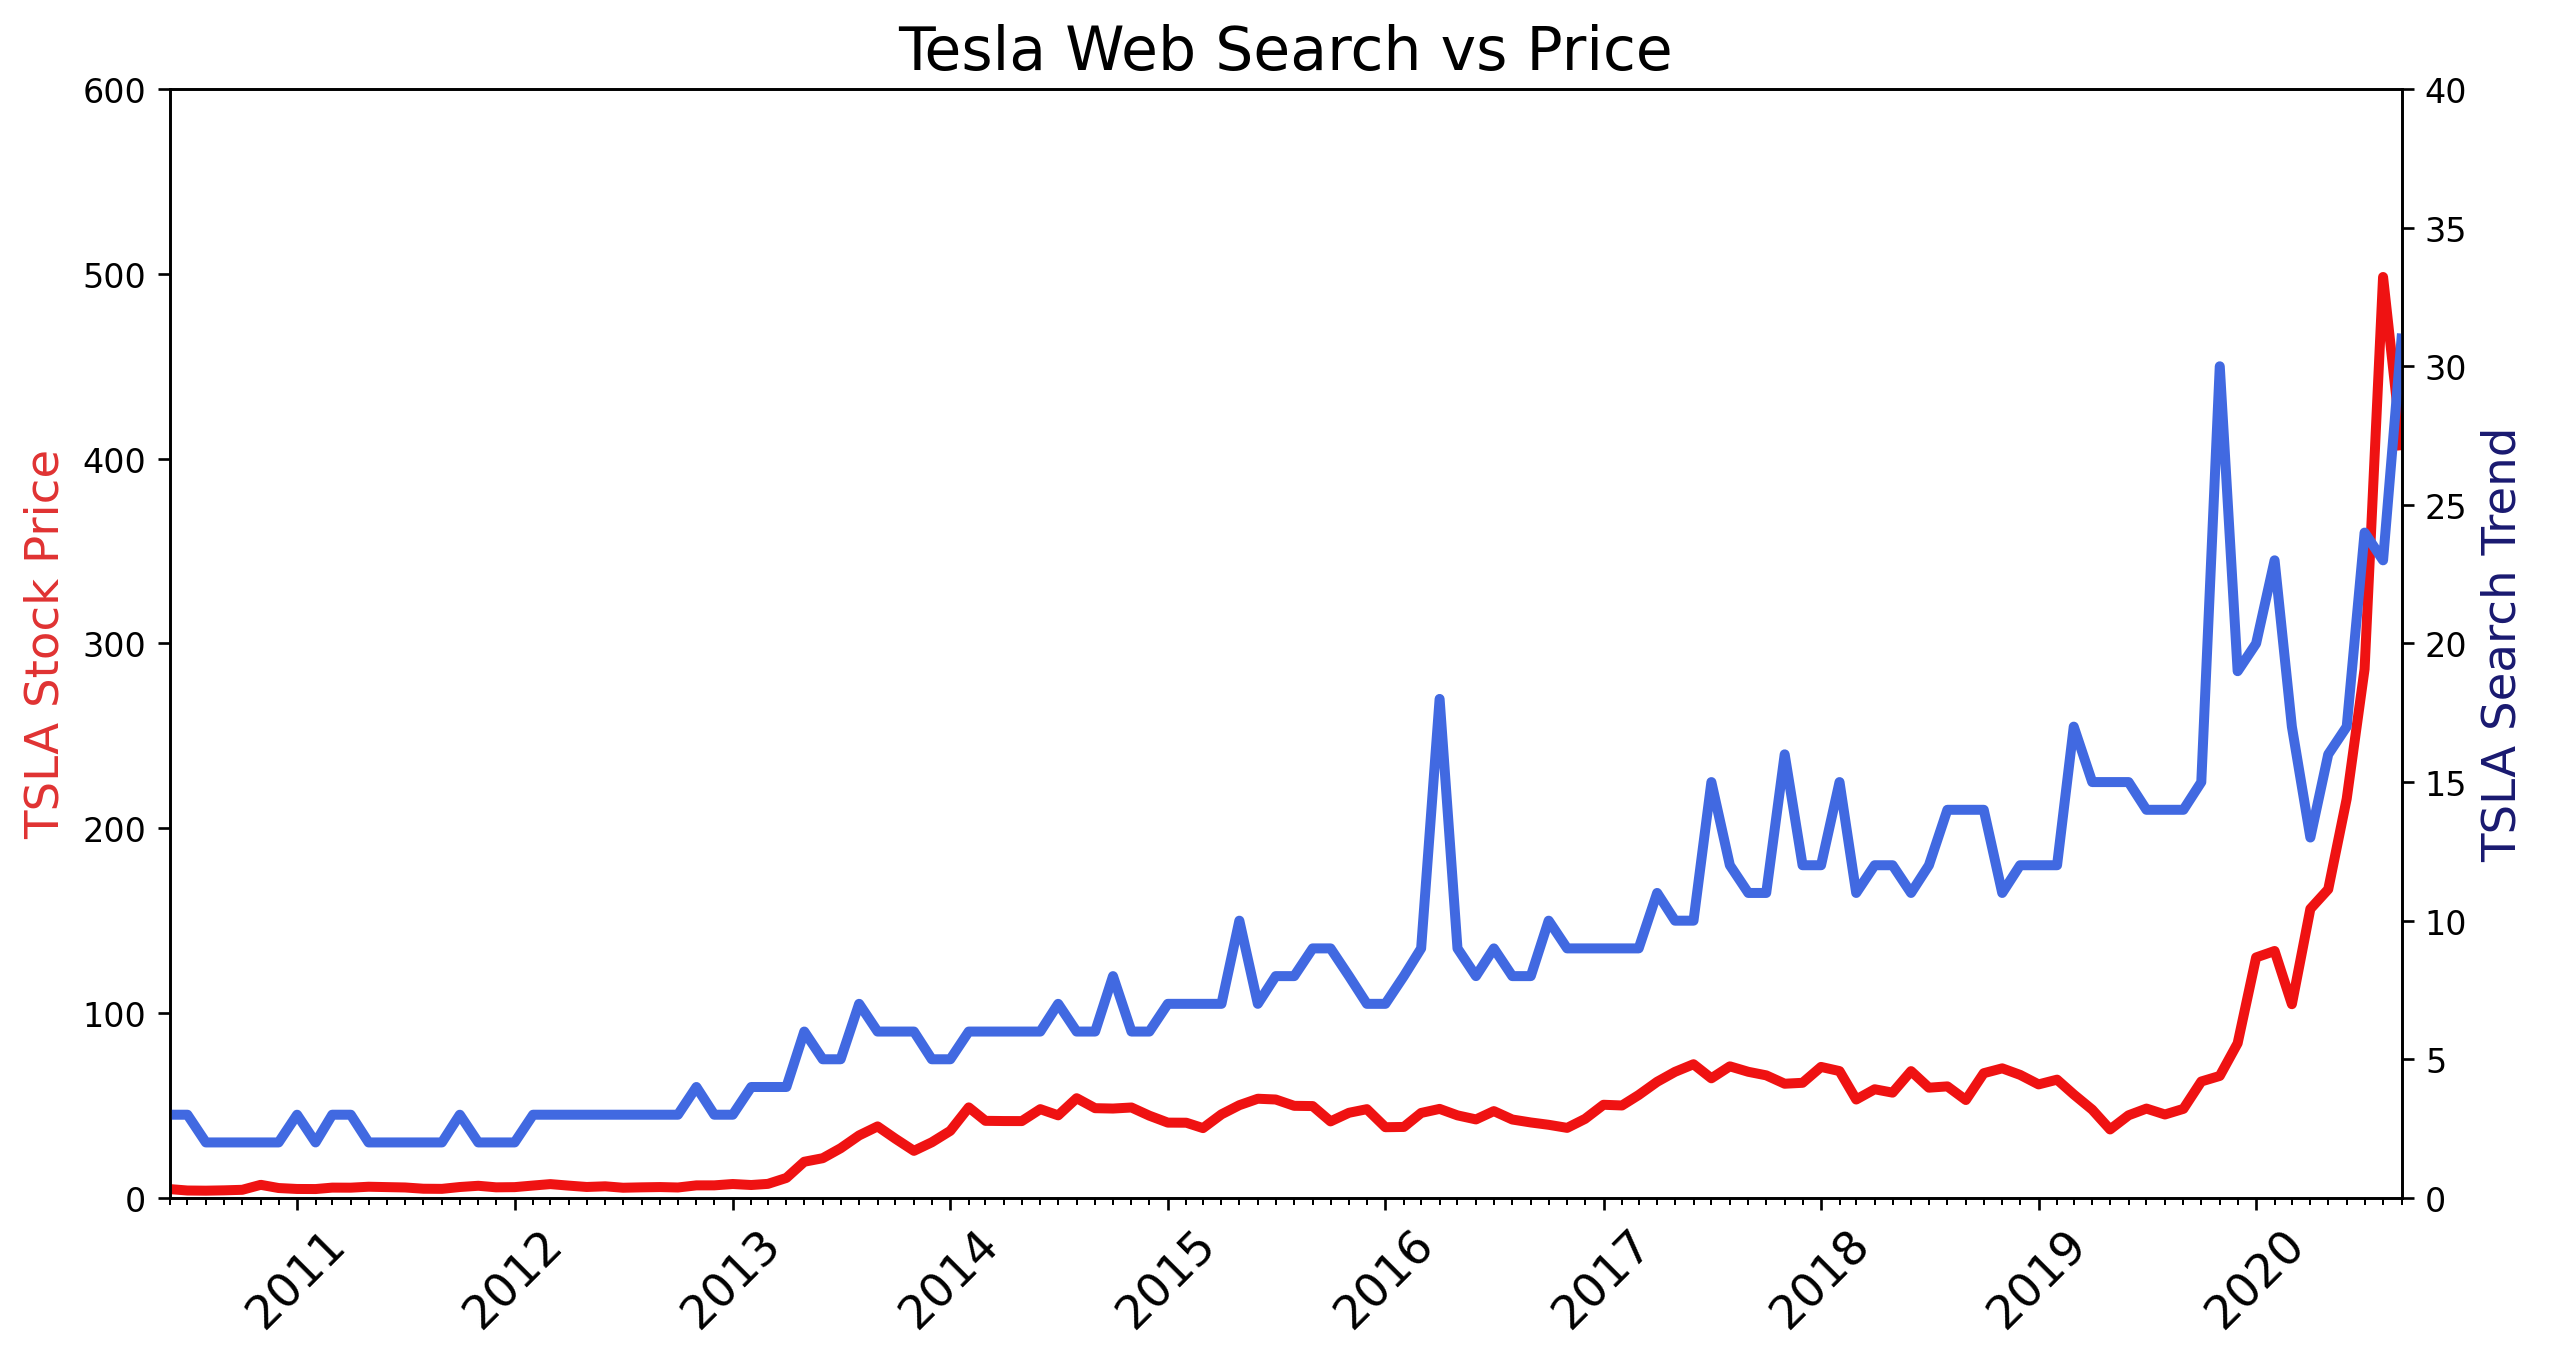

In [49]:
plt.figure(figsize=(12,6), dpi=240)
plt.title('Tesla Web Search vs Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.set_ylim([0, 600])
ax2.set_ylim([0, 40])
ax1.set_ylabel('TSLA Stock Price', color='#e03232', fontsize=14)
ax2.set_ylabel('TSLA Search Trend', color='midnightblue', fontsize=14)
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#ef1212', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='royalblue', linewidth=3)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(months)
# I put these straight from the course, this will format the X-axis for the plot

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

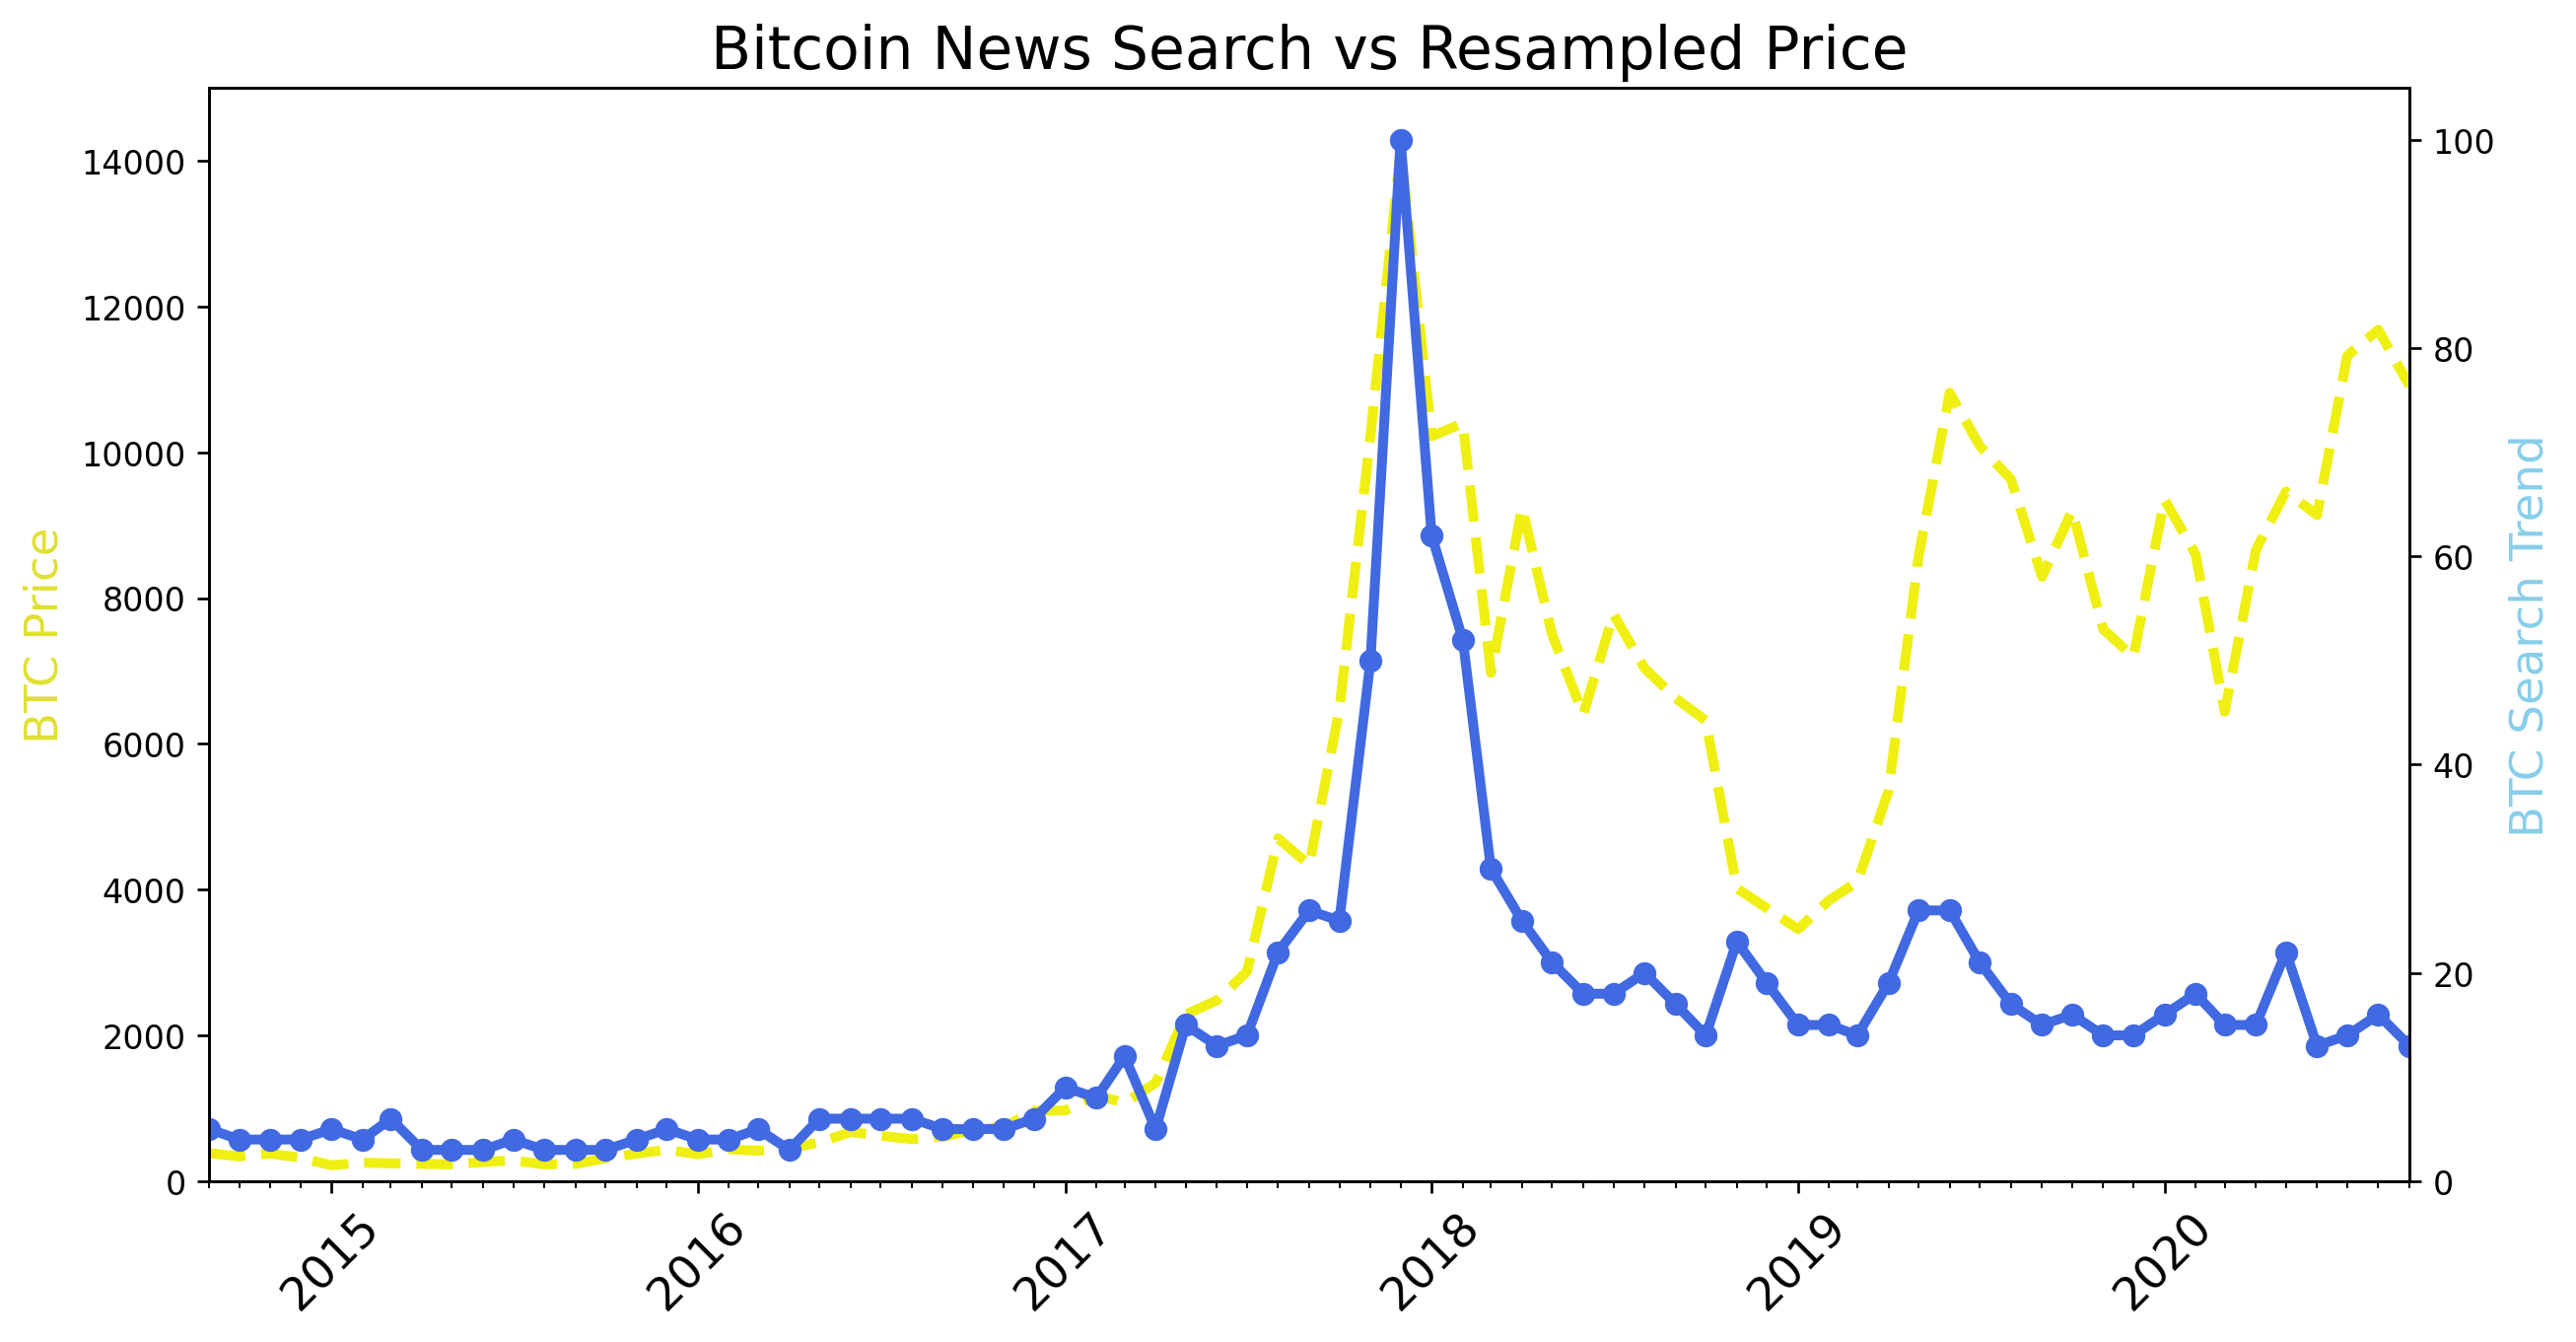

In [68]:
plt.figure(figsize=(12,6), dpi=240)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim([df_btc_search.MONTH.min(), df_btc_search.MONTH.max()])
# ax2.set_xlim([btc_price_monthly.index.min(), btc_price_monthly.index.max()])
# This was not really necessary
ax1.set_ylim([0, 15000])
ax2.set_ylim([0, 105])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('BTC Price', color='#e0e032', fontsize=14) # I tried to put linestyle property here
ax2.set_ylabel('BTC Search Trend', color='skyblue', fontsize=14) # And tried marker property here

ax1.plot(btc_price_monthly.index, btc_price_monthly.CLOSE, color='#efef12', linewidth=3, linestyle='dashed') # Could have probably used 'r--' for red and dashed
ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, color='royalblue', linewidth=3, marker='o') # could have used 'bo' for blue with circle markers

plt.show()

We can see that there was a big spike in both the price and search volume in 2018, but later spikes in price did not see such large spikes in the search volume.

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate.
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?

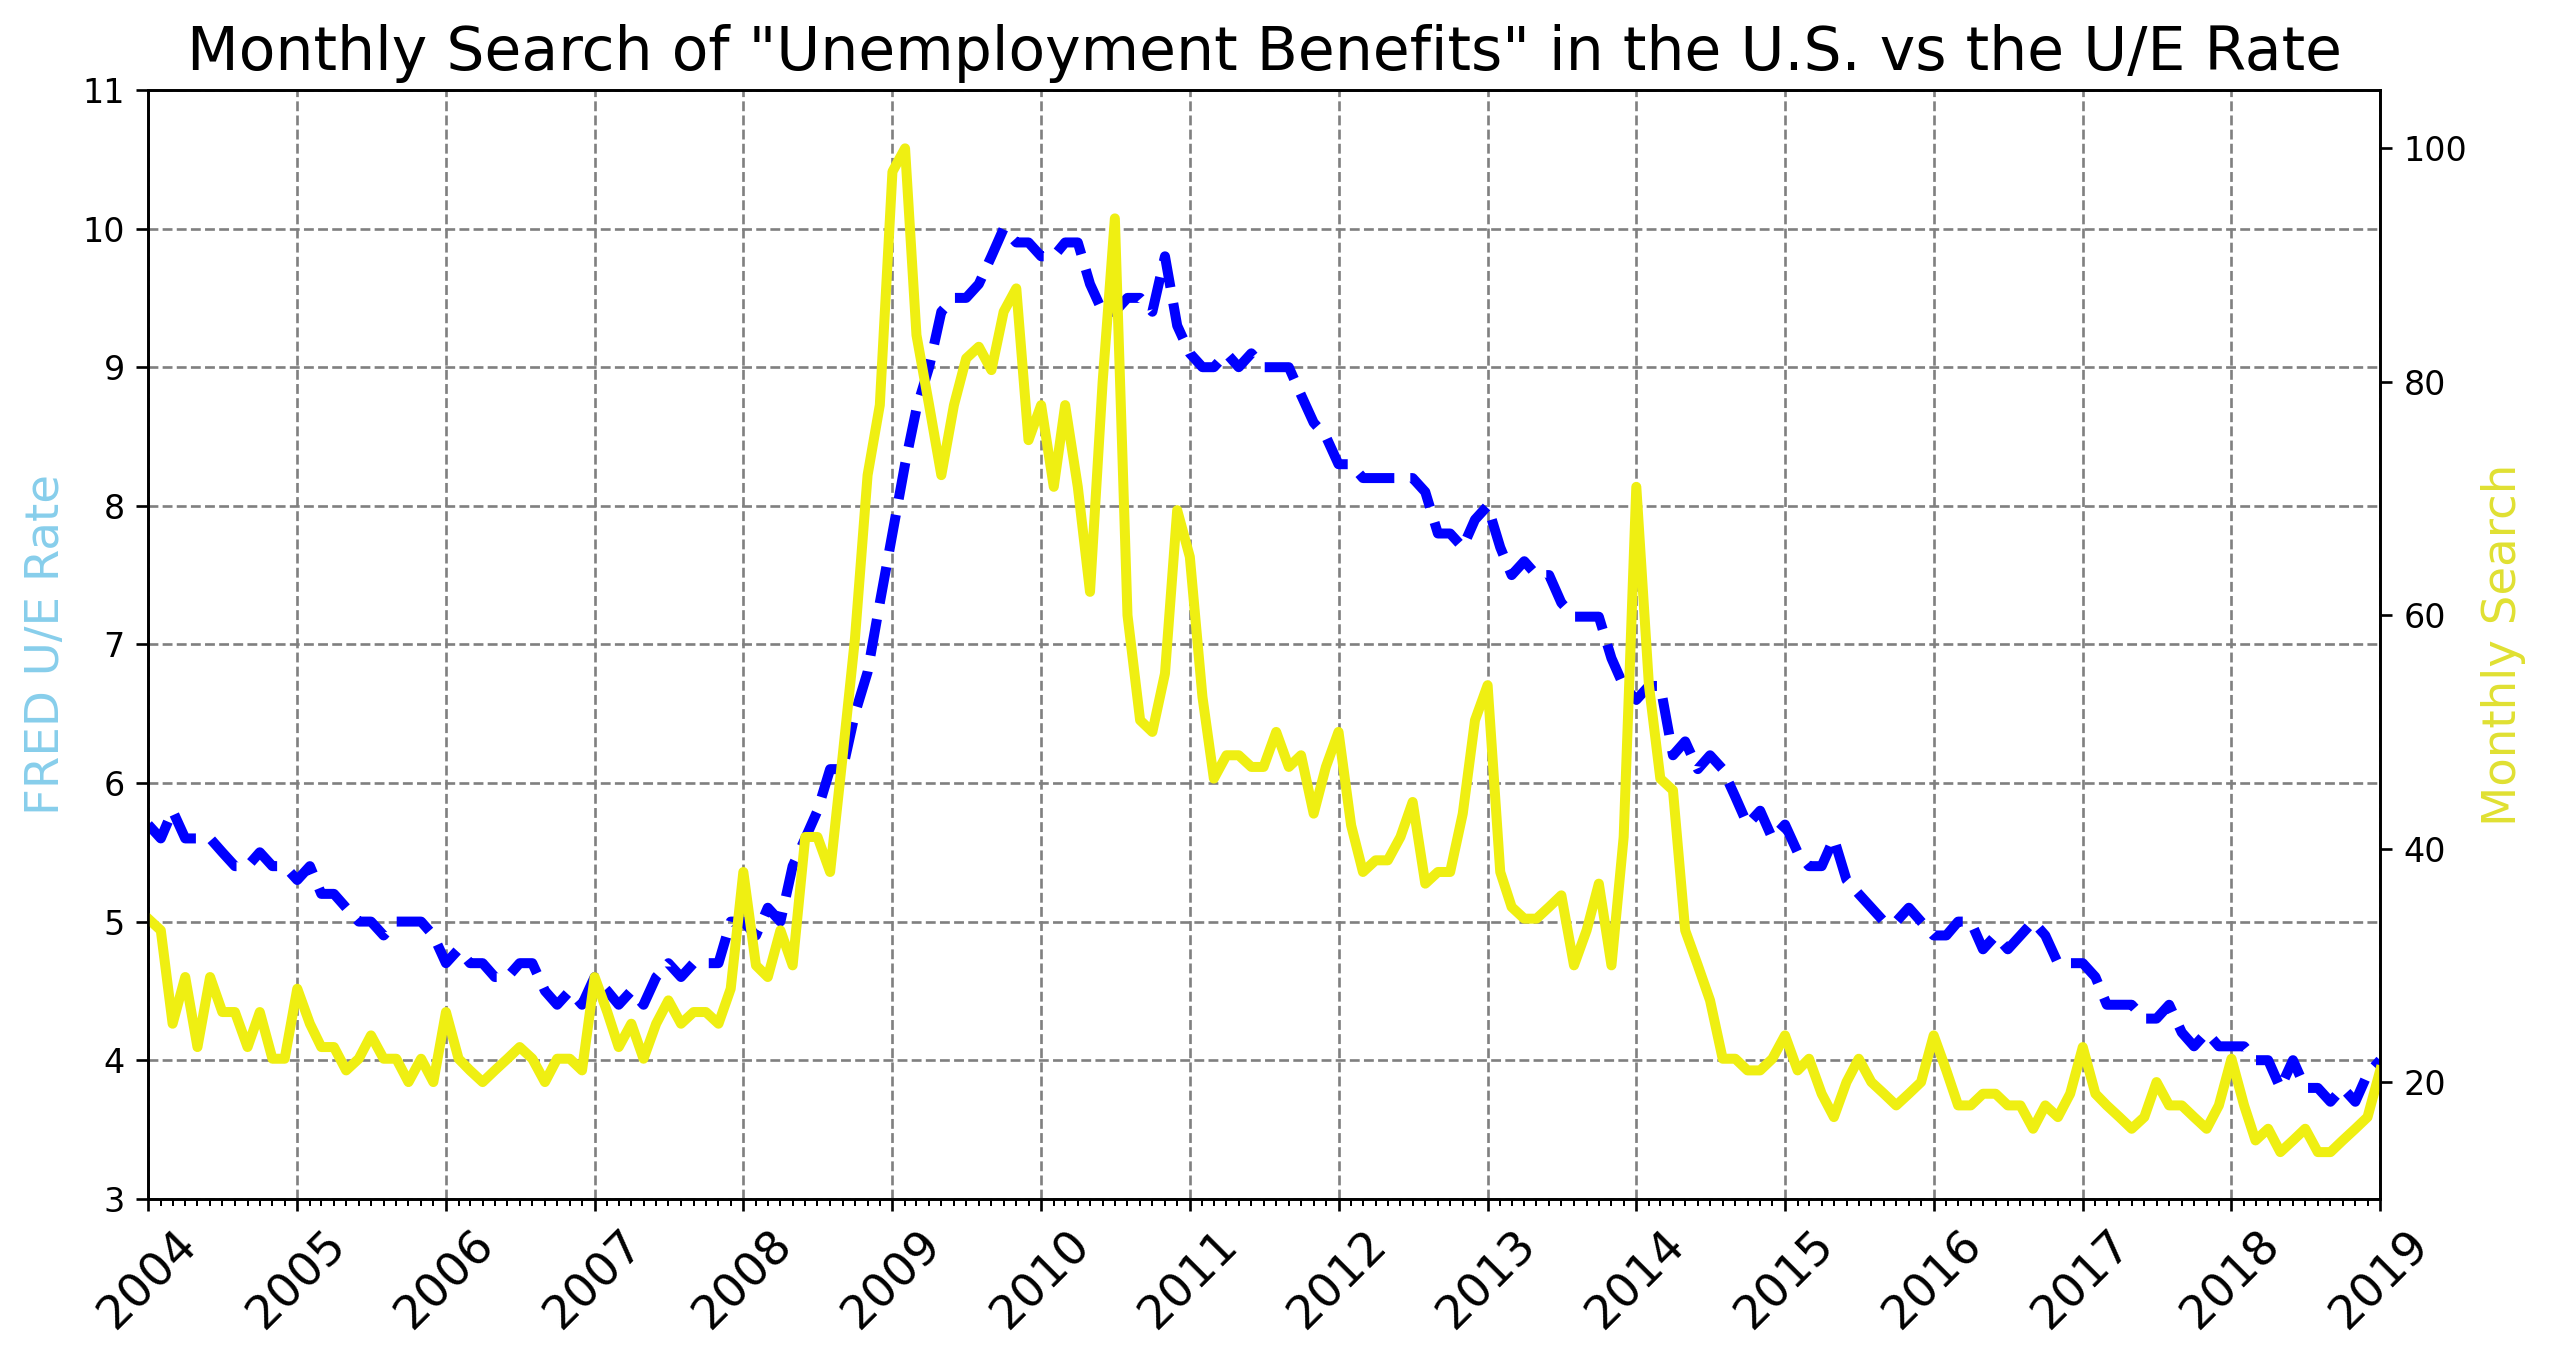

In [80]:
plt.figure(figsize=(12,6), dpi=240)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.grid(color='grey', linestyle='--')

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.set_ylabel('FRED U/E Rate', color='skyblue', fontsize=14)
ax2.set_ylabel('Monthly Search', color='#e0e032', fontsize=14)

ax1.set_ylim([3, 11])
ax2.set_ylim([10, 105])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, 'b--', linewidth=3)
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='#efef12', linewidth=3)

plt.show()

From the data we see that there was a large spike in both search volumes and the U/E rate after the financial crisis of 2008.The spikes are generally seen at year end and there was an increase in search volume despite no change in U/E rate at the end of 2013

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


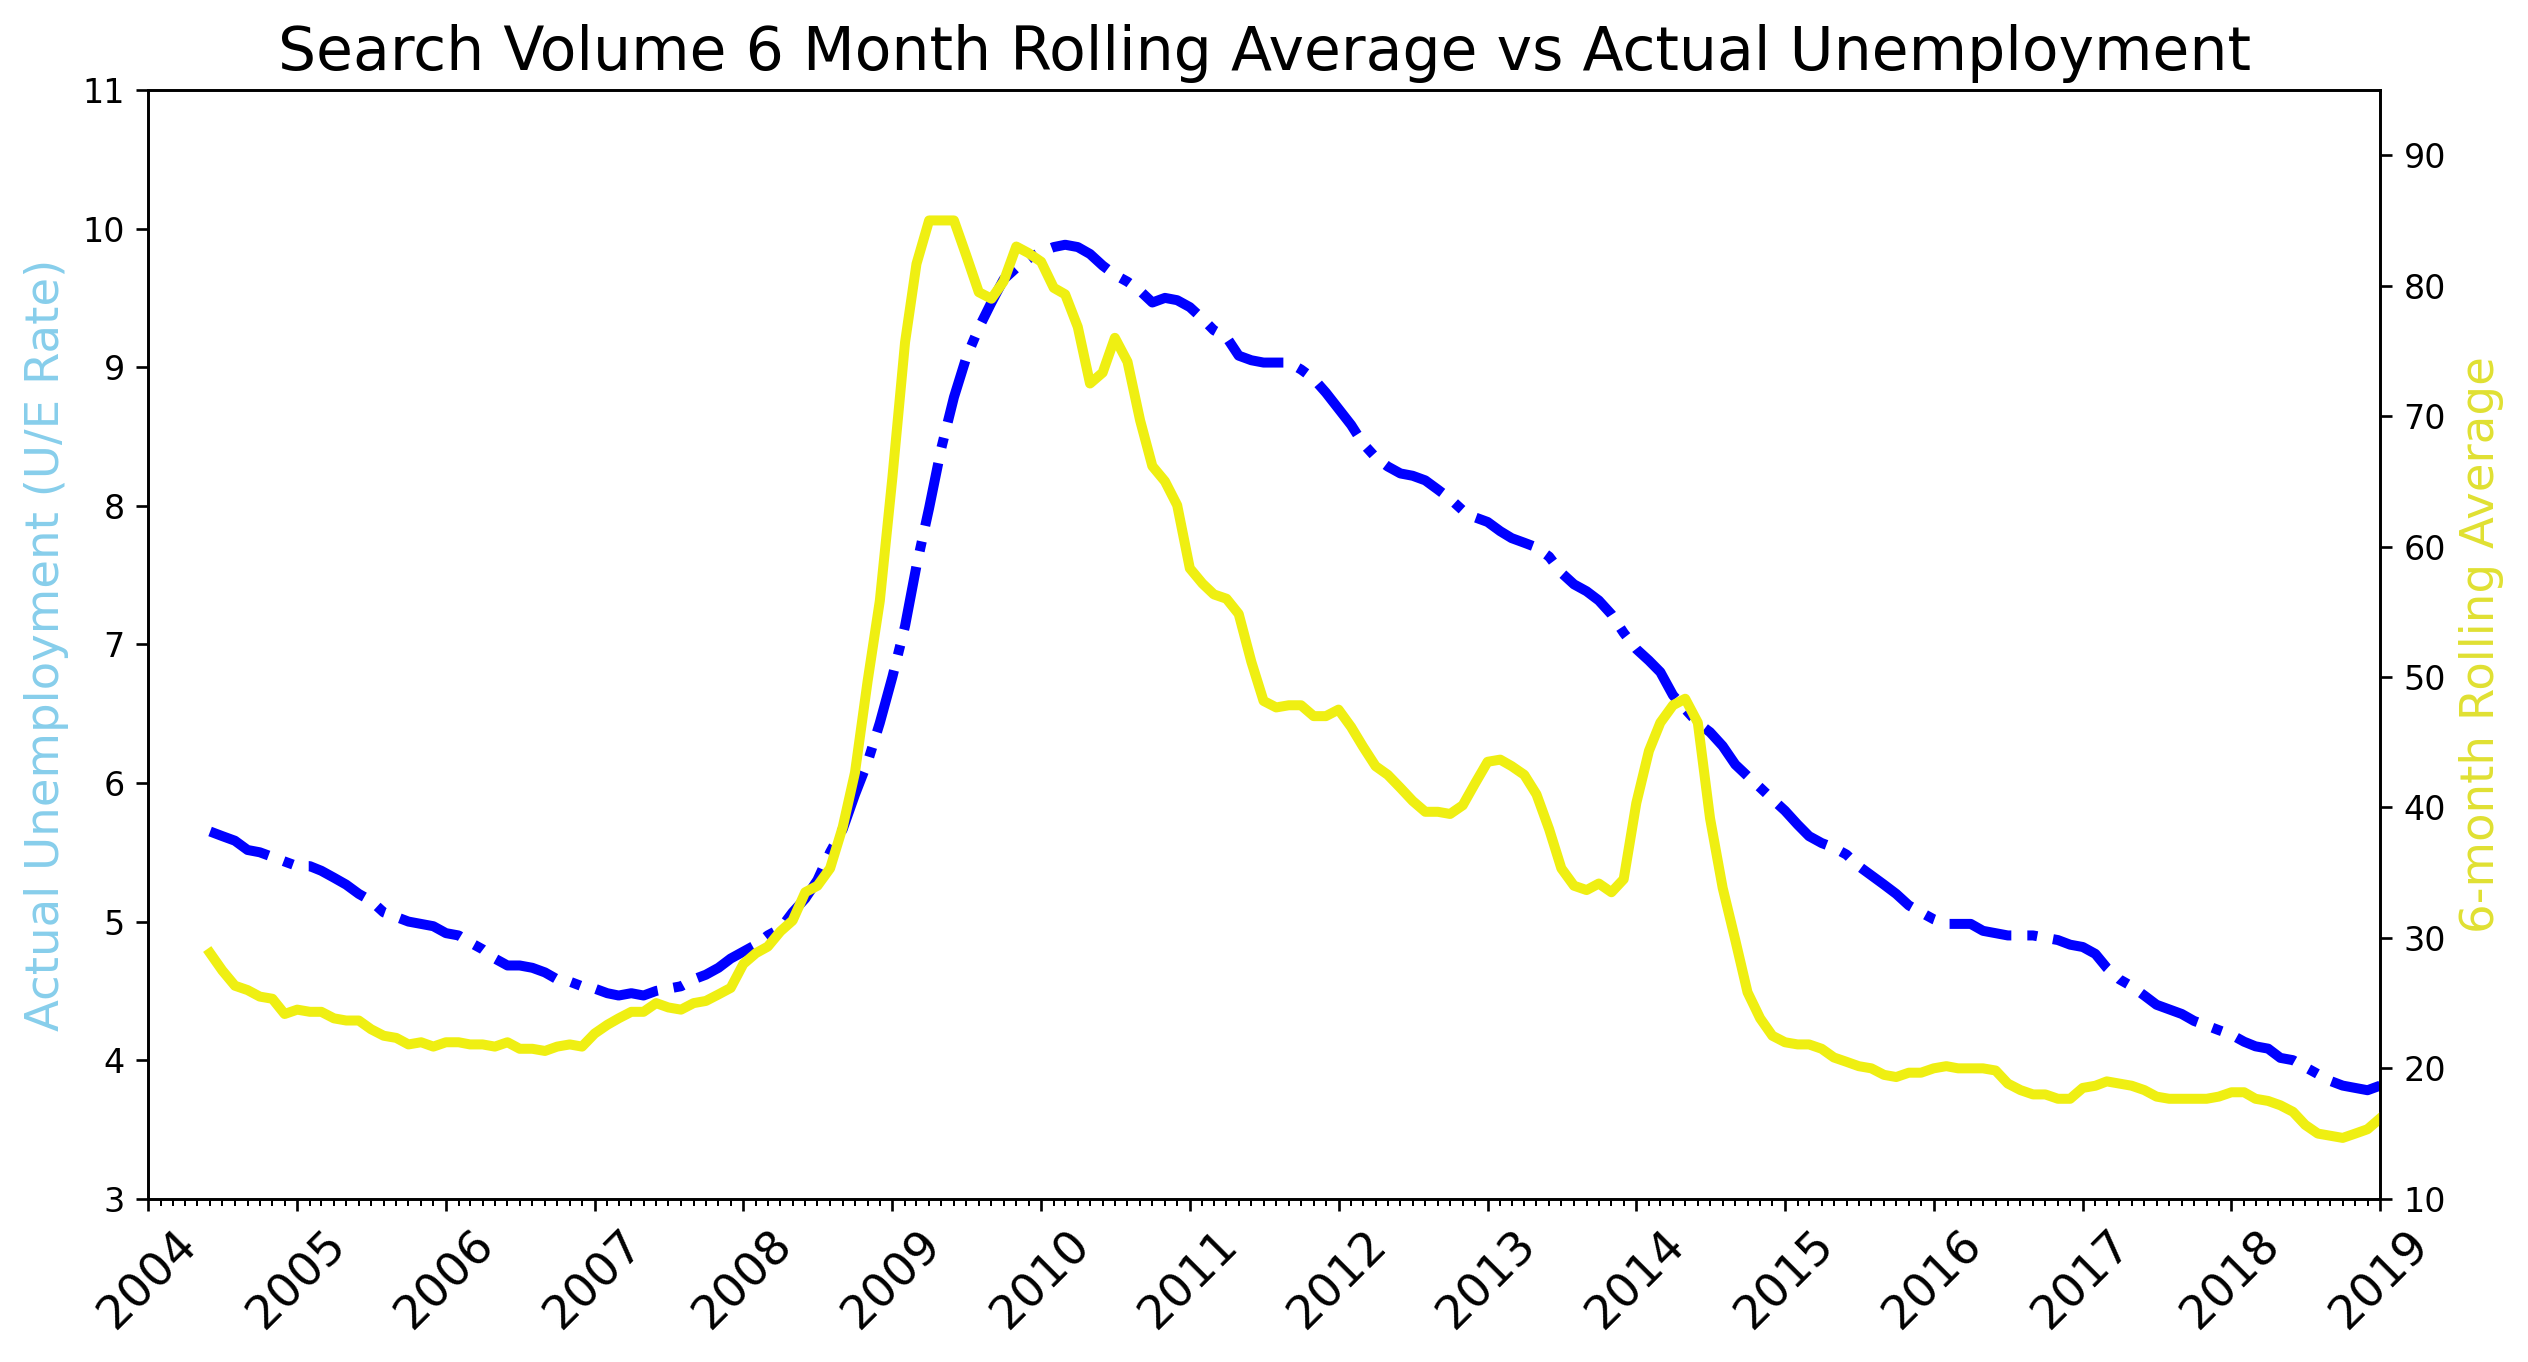

In [95]:
plt.figure(figsize=(12,6), dpi=240)
plt.title('Search Volume 6 Month Rolling Average vs Actual Unemployment', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.set_ylabel('Actual Unemployment (U/E Rate)', color='skyblue', fontsize=14)
ax2.set_ylabel('6-month Rolling Average', color='#e0e032', fontsize=14)

ax1.set_ylim([3, 11])
ax2.set_ylim([10, 95])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(months)

rolling_avg = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(df_unemployment.MONTH, rolling_avg.UNRATE, 'b-.', linewidth=3)
ax2.plot(df_unemployment.MONTH, rolling_avg.UE_BENEFITS_WEB_SEARCH, color='#efef12', linewidth=3)

plt.show()

Here we can see that searches for Unemployment Benefits are spiking before the actual unemployment rate spikes, and similarly lower before unemployment lowers

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [97]:
unemployment20_df = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
unemployment20_df.MONTH = pd.to_datetime(unemployment20_df.MONTH)
print(type(unemployment20_df.MONTH[0]))
unemployment20_df.head()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6


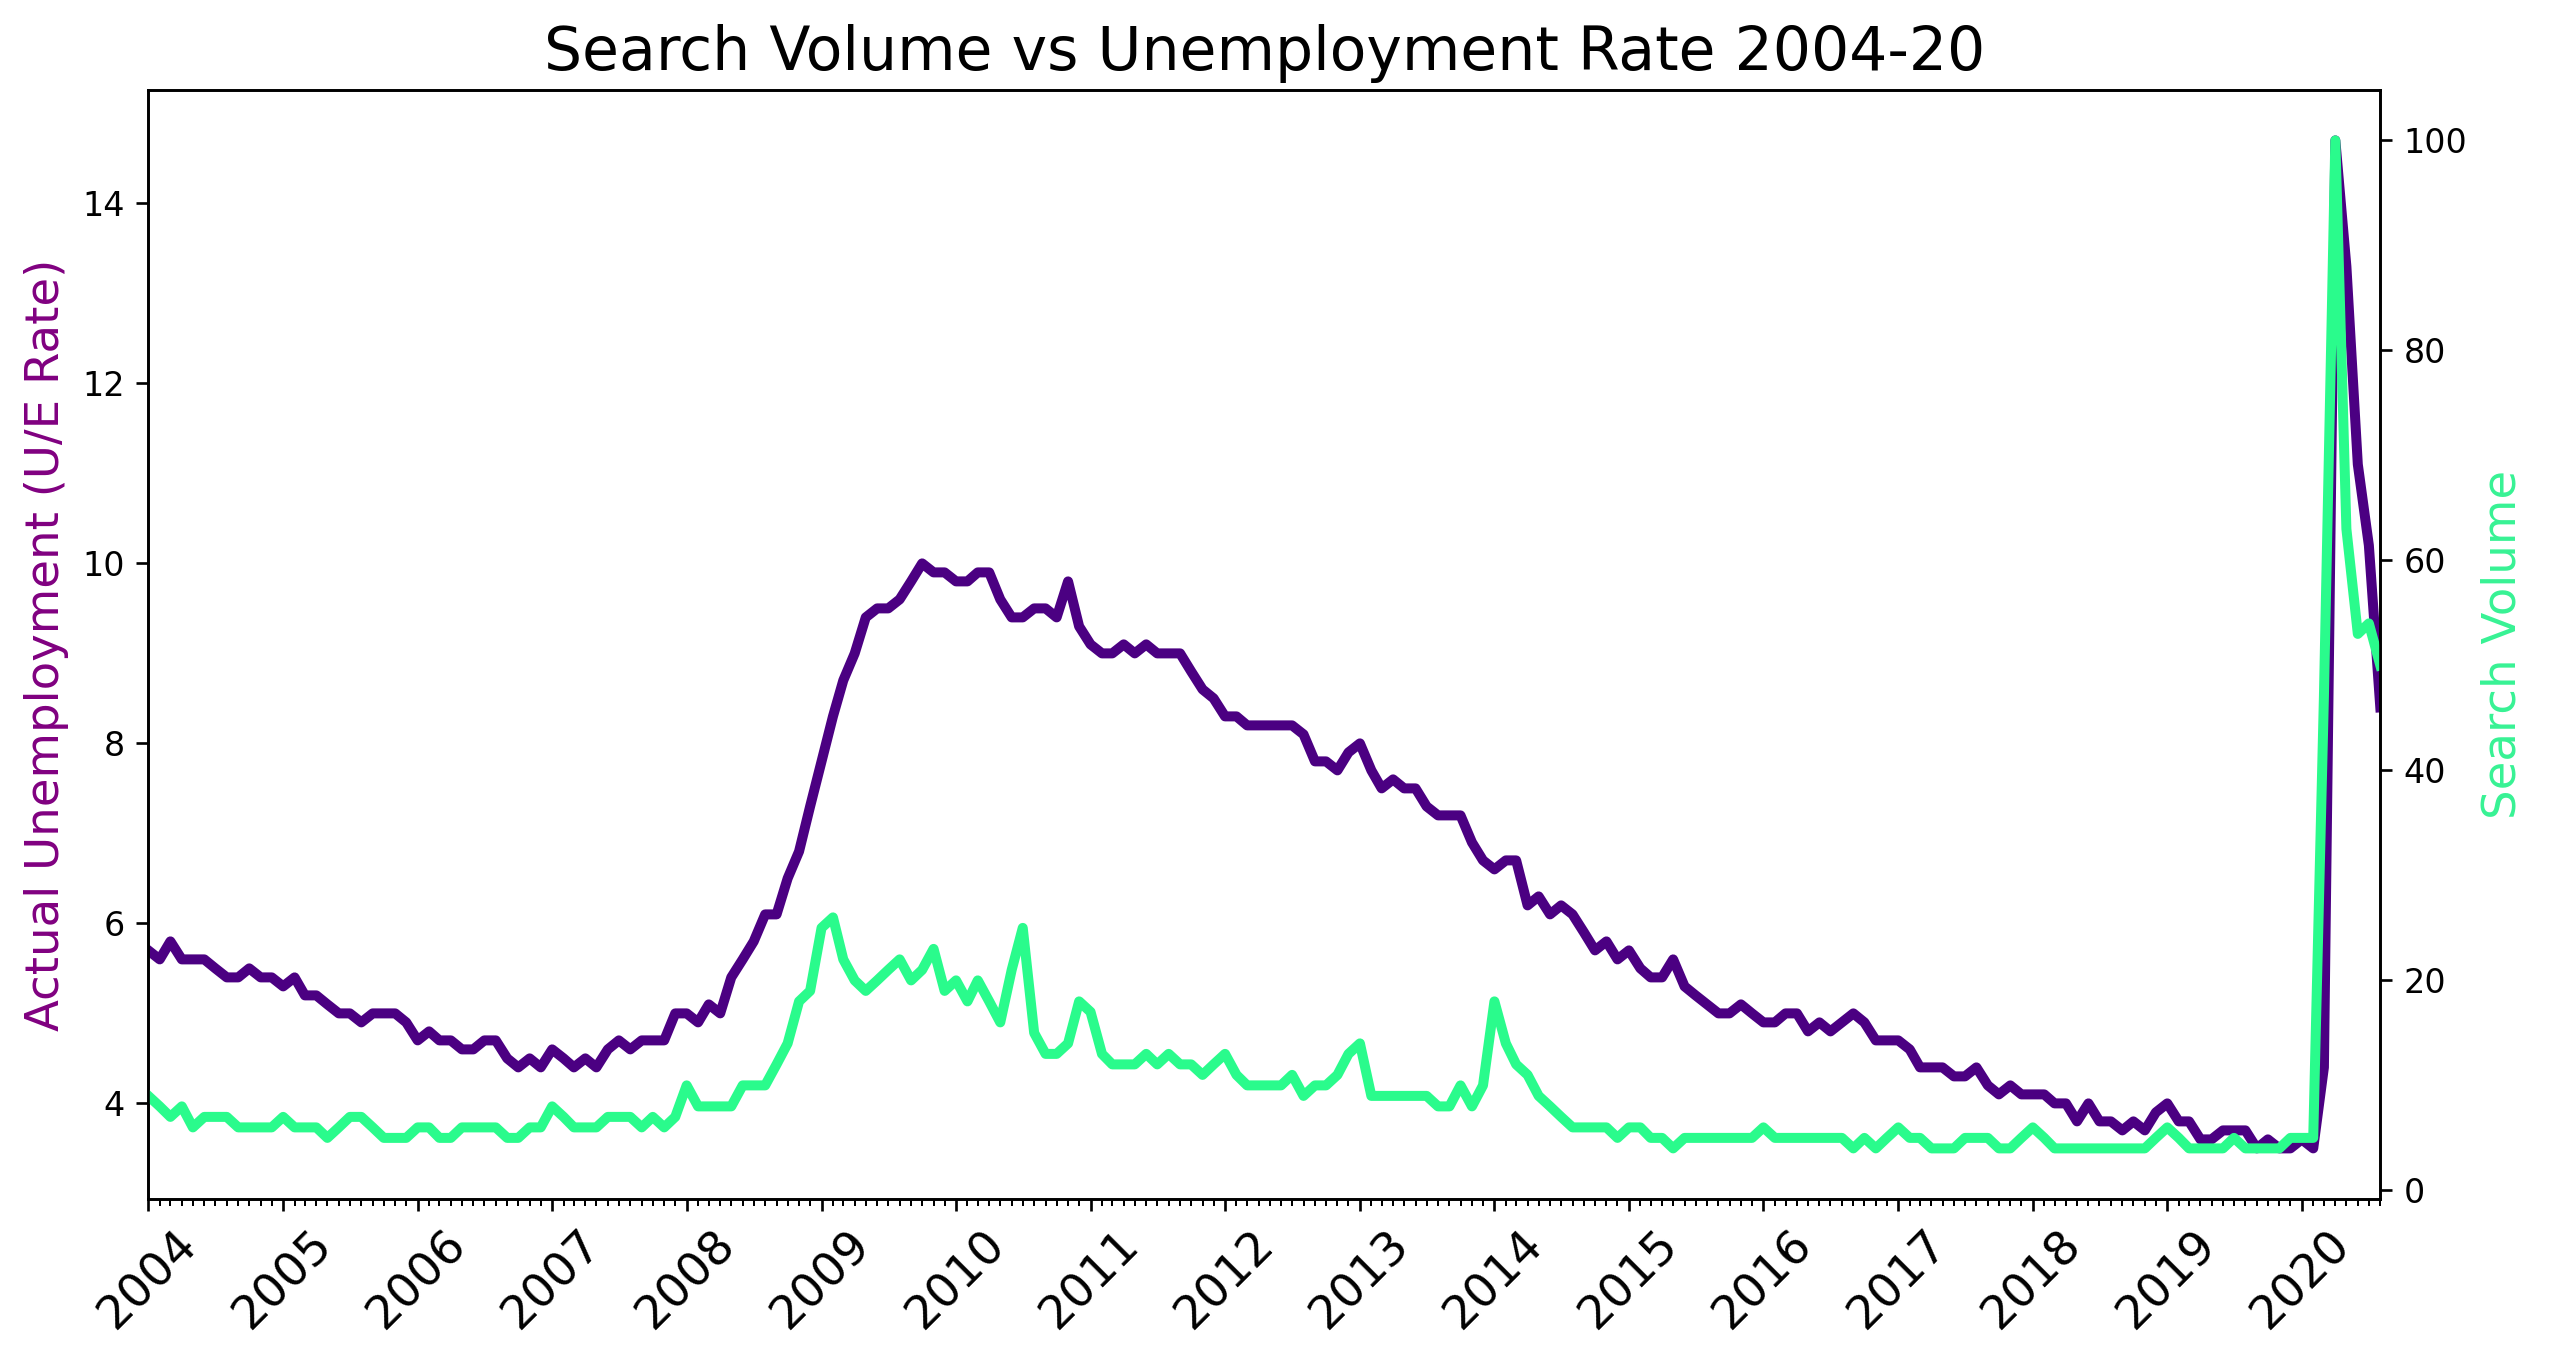

In [101]:
plt.figure(figsize=(12,6), dpi=240)
plt.title('Search Volume vs Unemployment Rate 2004-20', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim([unemployment20_df.MONTH.min(), unemployment20_df.MONTH.max()])

ax1.set_ylabel('Actual Unemployment (U/E Rate)', color='purple', fontsize=14)
ax2.set_ylabel('Search Volume', color='#37f294', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(unemployment20_df.MONTH, unemployment20_df.UNRATE, color='indigo', linewidth=3)
ax2.plot(unemployment20_df.MONTH, unemployment20_df.UE_BENEFITS_WEB_SEARCH, color='#2afb8c', linewidth=3)

plt.show()

We can clearly see that the unemployment rates and the search volume both skyrocketed during the Covid-19 pandemic. Brutal.

This is it for today's lessons.